$$ EN3160 \quad Assignment \quad 1\quad  on \quad Intensity  \quad Transformations  \quad and  \quad Neighborhood  \quad Filtering $$

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


$ Question \quad 1 $

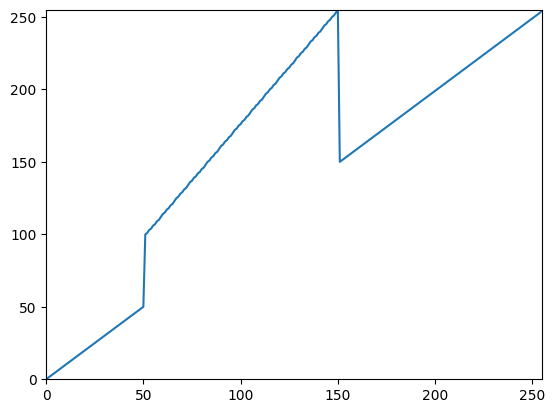

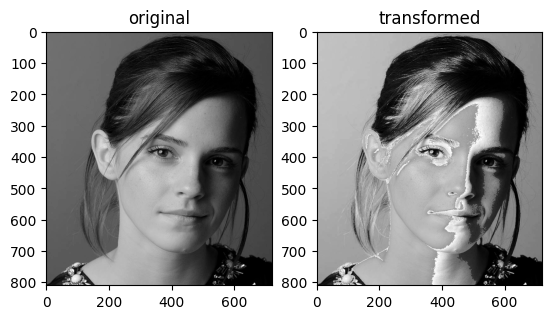

In [2]:
#import image
img_1 = cv.imread('emma.jpg' , cv.IMREAD_GRAYSCALE)
#trasformer
c = np.array([(50,50) ,(50,100), (150,255), (150,150), (255,255) ] )
t1 = np.linspace(0, c[0,1], c[0,0] + 1).astype('uint8')
t2 = np.linspace(c[1,1], c[2,1], c[1,1] ).astype('uint8')
t3 = np.linspace(c[3,1], c[4,1], 105).astype('uint8')
t = np.concatenate((t1,t2,t3), axis = 0)

#plot the graph

plt.plot(t)
plt.xlim(0,255)
plt.ylim(0,255)
plt.show()

#apply the transformer

transformed_img_1 = cv.LUT(img_1, t)

# #show both original and transformed image
# cv.imshow('original', img_1)
# cv.imshow('transformed', transformed_img_1)
# cv.waitKey(0)
# cv.destroyAllWindows()

#plot two images
plt.subplot(1,2,1)
plt.imshow(img_1, cmap = 'gray')
plt.title('original')
plt.subplot(1,2,2)
plt.imshow(transformed_img_1, cmap = 'gray')
plt.title('transformed')
plt.show()




$ Question \quad 2 $

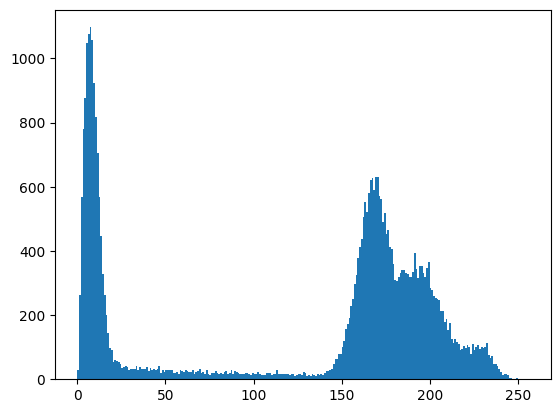

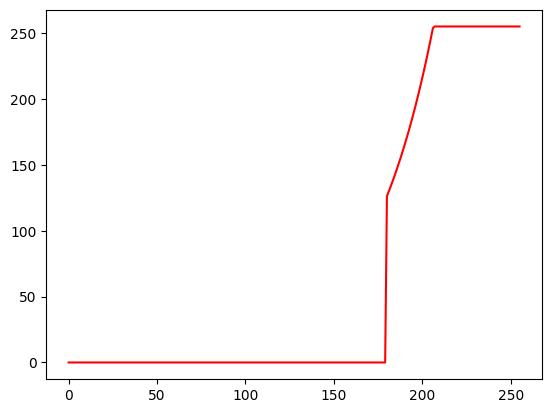

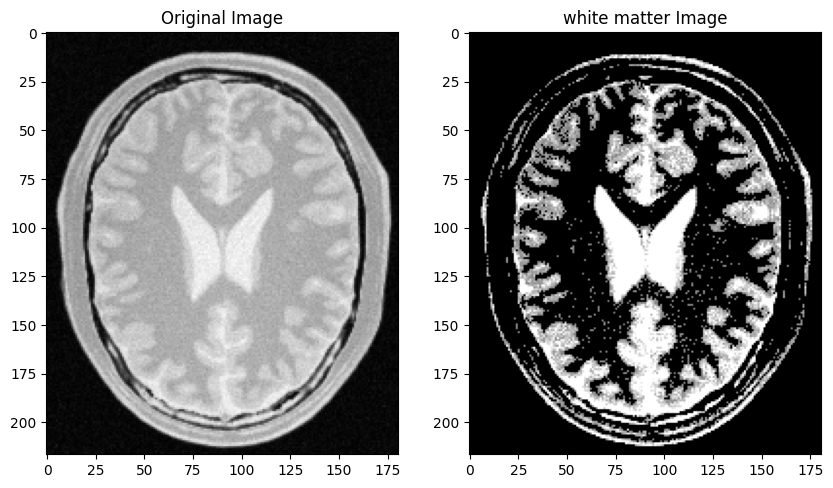

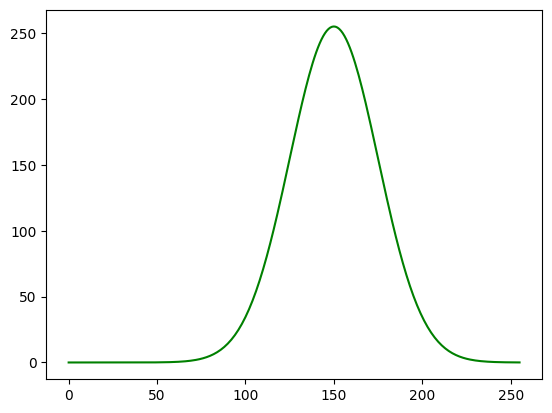

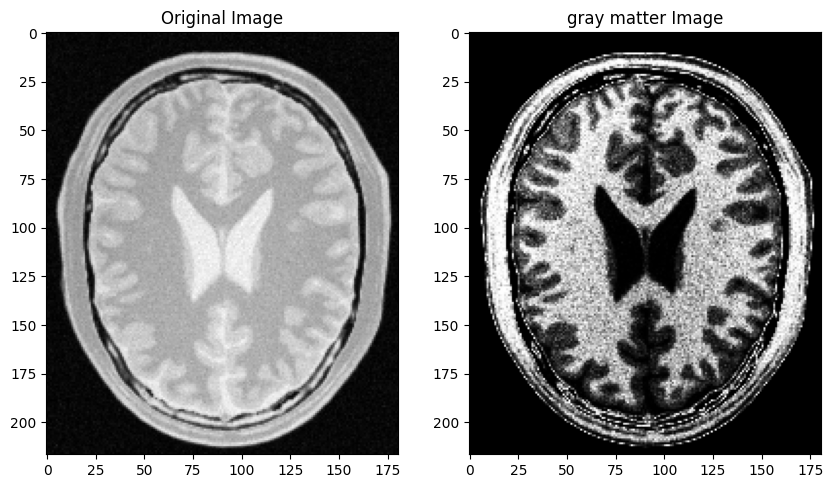

In [31]:
img_2 = cv.imread('BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)

#plot histrogram
plt.hist(img_2.ravel(), 256, [0,256])
plt.show()


#(a) accentuate white matter

# tranformer 1
list_1 = np.arange(0,256)
# t_2 = 6**(0.015*list_1)
# t_2 = (t_2/np.max(t_2))*255

t_2 = np.zeros(256)

t_2[180:] = np.clip((6**(0.015*list_1[180:])),a_min=None , a_max=255)


img_2_transformed= cv.LUT(img_2, t_2.astype('uint8'))
plt.plot(list_1, t_2, 'r')

#plot two images
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img_2, cmap='gray')
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(img_2_transformed, cmap='gray')
plt.title('white matter Image')
plt.show()


# (b) accentuate gray matter

# tranformer 2
mean = 150
std_dev = 25  
x = np.linspace(0, 255, 256)
y = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev)**2)
t_3 = (y - np.min(y)) * 255 / (np.max(y) - np.min(y))

img_2_transformed_2= cv.LUT(img_2, t_3.astype('uint8')) 
plt.plot(list_1, t_3, 'g')

#plot two images
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img_2, cmap='gray')
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(img_2_transformed_2, cmap='gray')
plt.title('gray matter Image')
plt.show()



$ Question \quad 3 $

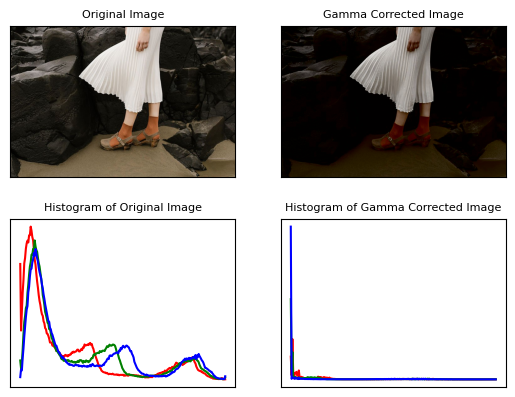

In [13]:
img_3 = cv.imread('highlights_and_shadows.jpg' , cv.IMREAD_COLOR)
img_3_1 = cv.cvtColor(img_3, cv.COLOR_BGR2Lab)

L =cv.split(img_3_1)[0]

#gamma correction
gamma = 0.35
table = np.array([((i / 255.0) ** (1.0 / gamma)) * 255 for i in np.arange(0, 256)]).astype("uint8")
L_corrected = cv.LUT(L, table)

img_3_gamma_corrected = cv.merge([L_corrected, cv.split(img_3_1)[1], cv.split(img_3_1)[2]])

# show the image
img_orig = cv.cvtColor(img_3, cv.COLOR_BGR2RGB)
img_gamma = cv.cvtColor(img_3_gamma_corrected, cv.COLOR_Lab2RGB)

color = ('r' , 'g' , 'b')
f, axarr = plt.subplots(2,2)

axarr[0,0].imshow(img_orig)
axarr[0,0].set_title('Original Image' , size = 8)
axarr[0,0].xaxis.set_visible(False)
axarr[0,0].yaxis.set_visible(False)

axarr[0,1].imshow(img_gamma)
axarr[0,1].set_title('Gamma Corrected Image' ,size = 8)
axarr[0,1].xaxis.set_visible(False)
axarr[0,1].yaxis.set_visible(False)

for i,c in enumerate (color):
    hist_original = cv.calcHist([img_3], [i], None, [256], [0,256])
    axarr[1,0].plot(hist_original, color = c)

    hist_corrected = cv.calcHist([img_gamma], [i], None, [256], [0,256])
    axarr[1,1].plot(hist_corrected, color = c)

axarr[1,0].set_title('Histogram of Original Image' , size = 8)
axarr[1,0].xaxis.set_visible(False)
axarr[1,0].yaxis.set_visible(False)

axarr[1,1].set_title('Histogram of Gamma Corrected Image', size = 8)
axarr[1,1].xaxis.set_visible(False)
axarr[1,1].yaxis.set_visible(False)





$ \gamma $ $\quad$ =  $\quad$ 2.2

$Question \quad 4 $

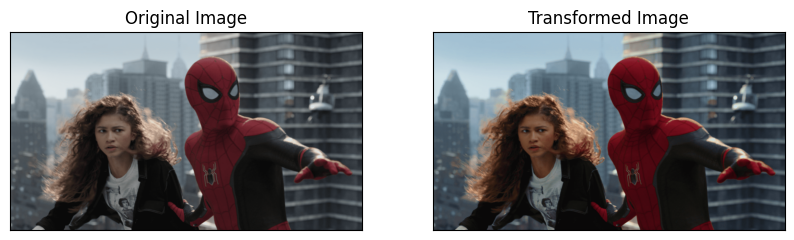

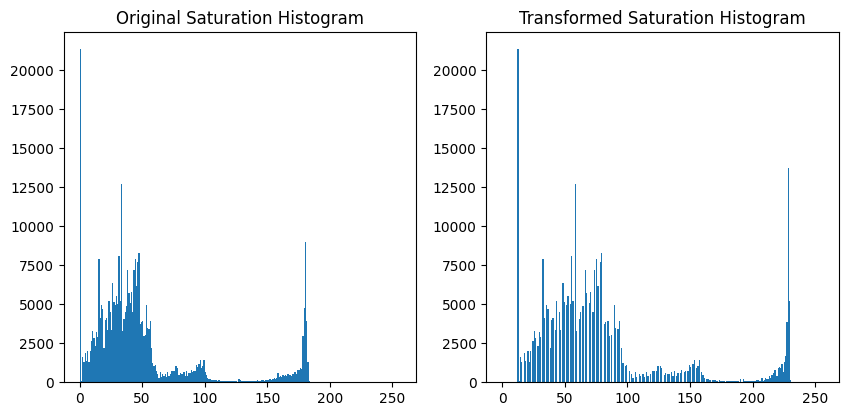

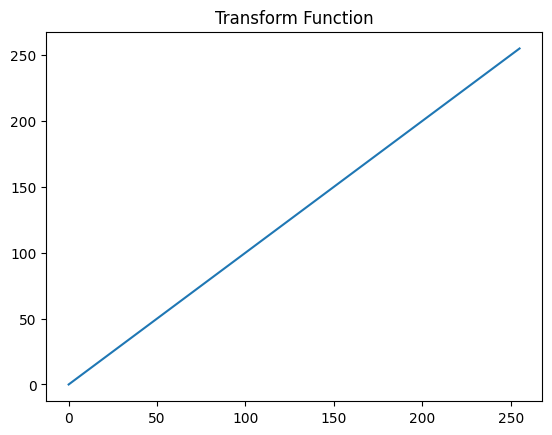

In [3]:
# Load the image
img_4 = cv.imread('spider.png', cv.IMREAD_COLOR)

# Split the image
hue, saturation, value = cv.split(cv.cvtColor(img_4, cv.COLOR_BGR2HSV))

# Transformation function
def transform4(arr, a, zegma):
    transformed_arr = []
    for i in arr:
        tr_list = []
        for x in i:
            t = min(x + (a * 128) * np.exp((-1 * (x - 128) ** 2) / (2 * zegma ** 2)), 255)
            tr_list.append(t)
        #converted to uint8
        transformed_arr.append(np.array(tr_list))
    transformed_arr = np.array(transformed_arr).astype(np.uint8)      
    return transformed_arr  

# Transform the image
saturation_transformed = transform4(saturation, 0.5, 70)

# Ensure all arrays have the same data type
hue = hue.astype(np.uint8)
value = value.astype(np.uint8)

# Merge the arrays
transformed_img_4 = cv.merge([hue, saturation_transformed, value])

# Plot images
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img_4, cv.COLOR_BGR2RGB))
plt.xticks([])
plt.yticks([])
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(transformed_img_4, cv.COLOR_HSV2RGB))
plt.xticks([])
plt.yticks([])
plt.title('Transformed Image')
plt.show()

# Plot histograms
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.hist(saturation.ravel(), 256, [0, 256])
plt.title('Original Saturation Histogram')
plt.subplot(2, 2, 2)
plt.hist(saturation_transformed.ravel(), 256, [0, 256])
plt.title('Transformed Saturation Histogram')
plt.show()


#plot transform
list_t = np.arange(0,256)
transform_plt = []
for x in list_t:
    t = min(x + (0.5 / 128) * np.exp((-1 * (x - 128) ** 2) / (2 * 70 ** 2)), 255)
    transform_plt.append(t)
plt.plot(list_t, transform_plt)
plt.title('Transform Function')
plt.show()



$Question \quad 5$

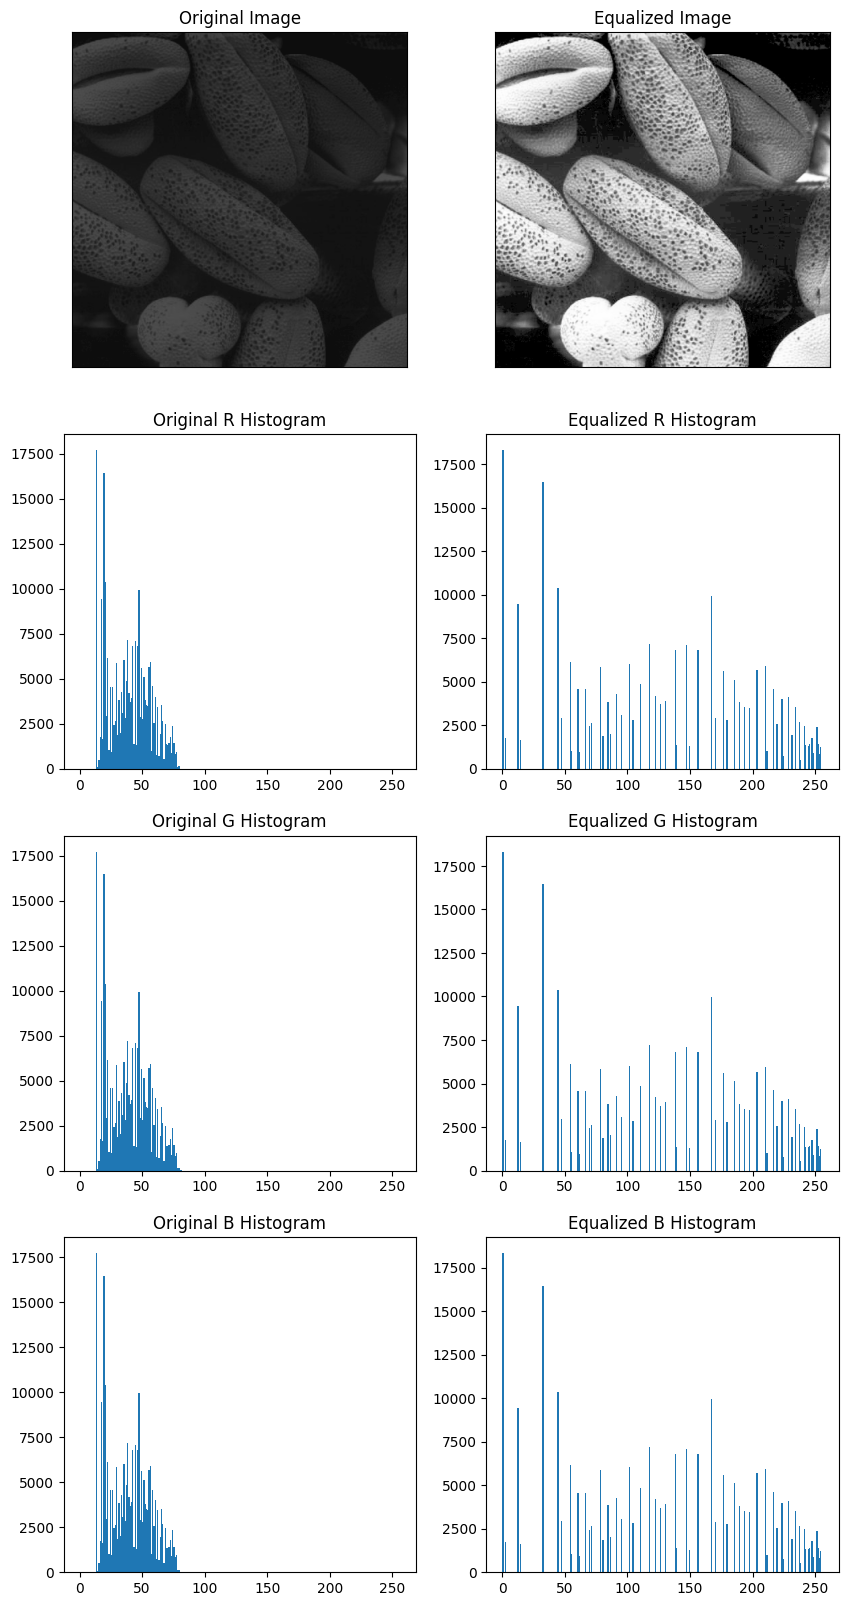

In [5]:
img_5 = cv.imread('shells.tif', cv.IMREAD_COLOR)

img_5_cvt = cv.cvtColor(img_5, cv.COLOR_BGR2RGB)
img_5_1 = img_5_cvt.copy()

#histogram equalization
def hist_eq(img):
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')
    equalized_img = cdf[img]
    return equalized_img


# equalize R plane
img_5_cvt[:,:,0] = hist_eq(img_5_cvt[:,:,0])
# equalize G plane
img_5_cvt[:,:,1] = hist_eq(img_5_cvt[:,:,1])
# equalize B plane 
img_5_cvt[:,:,2]= hist_eq(img_5_cvt[:,:,2])

# plot images
plt.figure(figsize=(10, 20))
plt.subplot(4, 2, 1)
plt.imshow(img_5_1)
plt.xticks([])
plt.yticks([])
plt.title('Original Image')
plt.subplot(4, 2, 2)
plt.imshow(img_5_cvt)
plt.xticks([])
plt.yticks([])
plt.title('Equalized Image')

# plot histograms plane by plane 
# r plane
plt.subplot(4, 2, 3)
plt.hist(img_5_1[:,:,0].ravel(), 256, [0, 256])
plt.title('Original R Histogram')
plt.subplot(4, 2, 4)
plt.hist(img_5_cvt[:,:,0].ravel(), 256, [0, 256])
plt.title('Equalized R Histogram')

# g plane
plt.subplot(4, 2, 5)
plt.hist(img_5_1[:,:,1].ravel(), 256, [0, 256])
plt.title('Original G Histogram')
plt.subplot(4, 2, 6)
plt.hist(img_5_cvt[:,:,1].ravel(), 256, [0, 256])
plt.title('Equalized G Histogram')

# b plane
plt.subplot(4, 2, 7)
plt.hist(img_5_1[:,:,2].ravel(), 256, [0, 256])
plt.title('Original B Histogram')
plt.subplot(4, 2, 8)
plt.hist(img_5_cvt[:,:,2].ravel(), 256, [0, 256])
plt.title('Equalized B Histogram')
plt.show()



$Question \quad6$

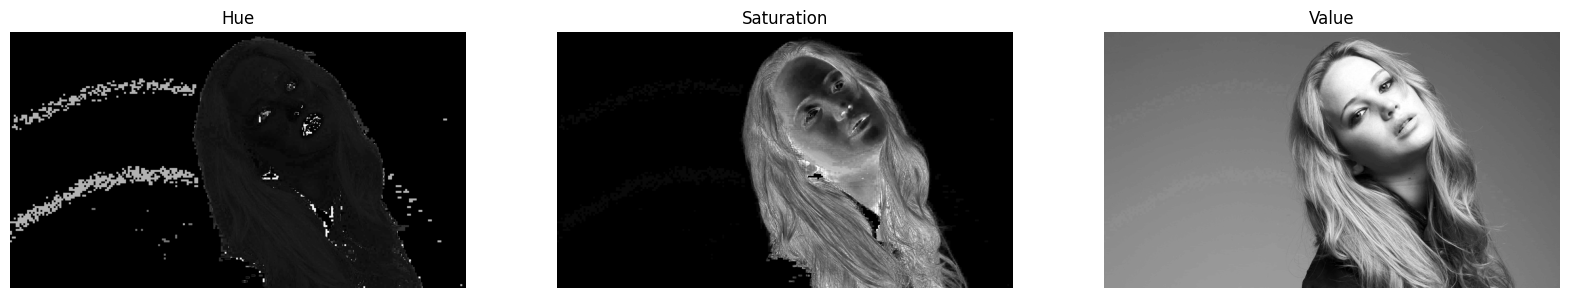

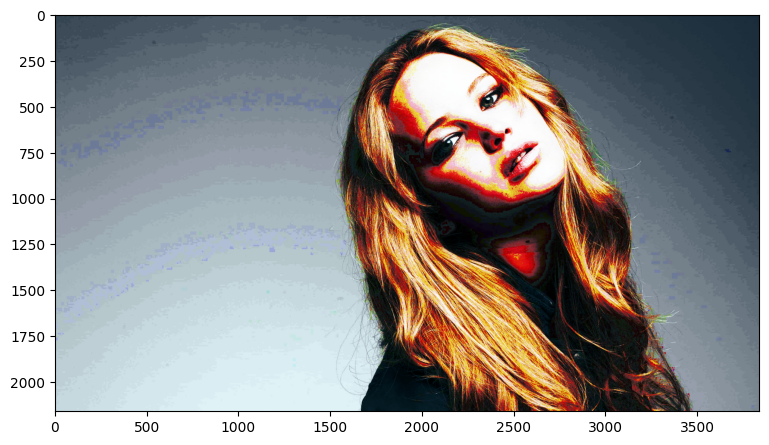

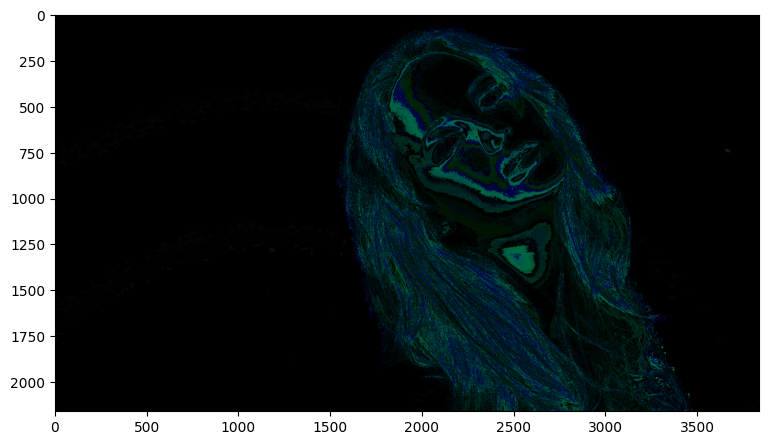

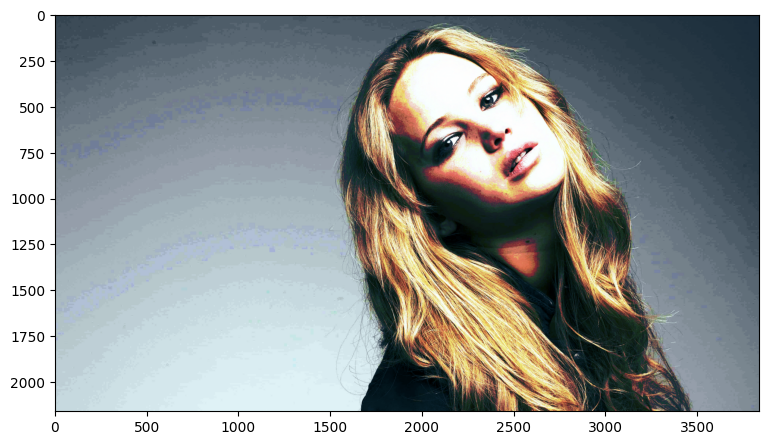

In [7]:
img_6 = cv.imread('jeniffer.jpg', cv.IMREAD_COLOR)

hue_6,saturation_6,value_6 = cv.split(cv.cvtColor(img_6, cv.COLOR_BGR2HSV))

#diplay above three planes in gray scale
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.imshow(hue_6, cmap='gray')
plt.axis('off') 
plt.title('Hue')
plt.subplot(1, 3, 2)
plt.imshow(saturation_6, cmap='gray')
plt.title('Saturation')
plt.axis('off') 
plt.subplot(1, 3, 3)
plt.imshow(value_6, cmap='gray')
plt.title('Value')
plt.axis('off') 
plt.show()

#extracting foregroud mask
mask = value_6

foreground_B = cv.bitwise_and(img_6[:,:,0],mask)
foreground_G = cv.bitwise_and(img_6[:,:,1],mask)
foreground_R = cv.bitwise_and(img_6[:,:,2],mask)
img_6_foreground = cv.merge([foreground_B, foreground_G, foreground_R])
    
img_6_foreground = cv.cvtColor(img_6_foreground, cv.COLOR_BGR2RGB)   
img_6_foreground_histEq = img_6_foreground.copy() 

# #plot images
# plt.figure(figsize=(20, 10))
# plt.subplot(1, 2, 1)
# plt.imshow(img_6_foreground)

#histogram equalization
img_6_foreground_histEq[:,:,0] = hist_eq(img_6_foreground[:,:,0])
img_6_foreground_histEq[:,:,1] = hist_eq(img_6_foreground[:,:,1])
img_6_foreground_histEq[:,:,2] = hist_eq(img_6_foreground[:,:,2])

#plot image
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(img_6_foreground_histEq)
plt.show()


#extract background mask
back_mask = cv.bitwise_not(mask)

background_B = cv.bitwise_and(img_6[:,:,0],back_mask)
background_G = cv.bitwise_and(img_6[:,:,1],back_mask)
background_R = cv.bitwise_and(img_6[:,:,2],back_mask)
img_6_background = cv.merge([background_B, background_G, background_R])

img_6_background = cv.cvtColor(img_6_background, cv.COLOR_BGR2RGB)

#plot background
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(img_6_background)
plt.show()

#add backgorind and foreground
img_6_final = cv.add(img_6_foreground_histEq, img_6_background)

#plot final image
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(img_6_final)
plt.show()



$Question \quad 7$

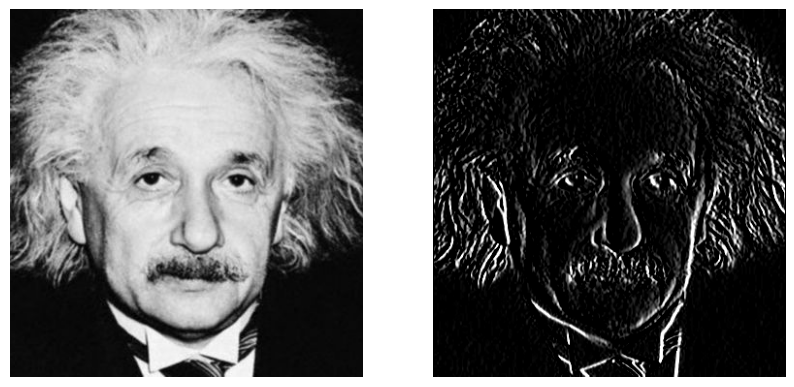

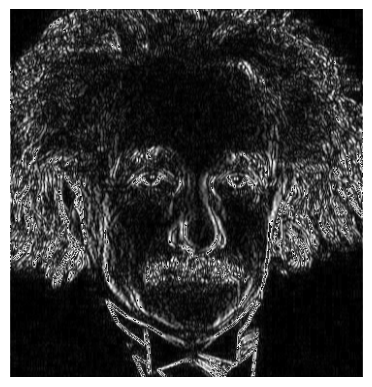

In [34]:
img_7 = cv.imread('einstein.png', cv.IMREAD_COLOR)
img_7_1 = cv.cvtColor(img_7, cv.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(img_7_1)
plt.axis('off')

# using build in function

kernel = np.array([(1,0,-1),(2,0,-2),(1,0,-1)], dtype= 'float')
img_7_filtered = cv.filter2D(img_7_1, -1, kernel)
plt.subplot(1, 2, 2)
plt.imshow(img_7_filtered)
plt.axis('off')
plt.show()

# using function
img_7_copy = img_7_1.copy()

def sobel_filtering(image_plane):
    sobel_kernel_c = np.array([(1),(2),(1)], dtype= 'float')
    sobel_kernel_r = np.array([(1,0,-1)], dtype= 'float')
   
    # Create a padded version of the image
    image_plane = np.pad(image_plane, ((1,1), (1,1)), mode='constant')

    img_sobel_1 = np.zeros((image_plane.shape[0],image_plane.shape[1]-2))
    for i in range(img_sobel_1.shape[0]):
        for j in range(img_sobel_1.shape[1]):
            img_sobel_1[i,j] = np.abs(np.sum(sobel_kernel_r * image_plane[i,j:j+3]))
    
    img_sobel_filtered = np.zeros((img_sobel_1.shape[0]-2,img_sobel_1.shape[1]))

    for x in range(img_sobel_filtered.shape[1]):
        for y in range(img_sobel_filtered.shape[0]):
            img_sobel_filtered[y,x] = np.abs(np.sum(sobel_kernel_c * img_sobel_1[y:y+3,x]))
                       
    #img_sobel_filtered = np.clip(img_sobel_filtered, 0, 255)
    #img_sobel_filtered = np.pad(img_sobel_filtered, ((1, 1), (1, 1)), mode='constant')
    return  img_sobel_filtered




#filtering
img_7_copy[:,:,0] = sobel_filtering(img_7_copy[:,:,0])
img_7_copy[:,:,1] = sobel_filtering(img_7_copy[:,:,1])
img_7_copy[:,:,2] = sobel_filtering(img_7_copy[:,:,2])

img_7_filtered_2 = img_7_copy

#plot image
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(img_7_filtered_2)
plt.axis('off')
plt.show()






In [27]:
l = np.array([[1],[2],[3]])
b=np.array([[1],[1],[0],[0]])
print(np.sum(l*b[:3,0]))

12
